In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/bikes_rent.csv")


In [5]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


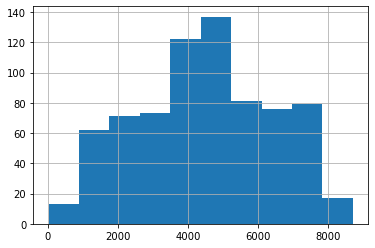

In [6]:
data["cnt"].hist();


In [7]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,5.705220,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,2.321125,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,0.670650,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,4.041864,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,5.420351,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,6.984967,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,15.198937,8714.000000


In [8]:
X_df, y_series = data.drop("cnt", axis=1), data["cnt"]

In [9]:
X_df.shape


(731, 12)

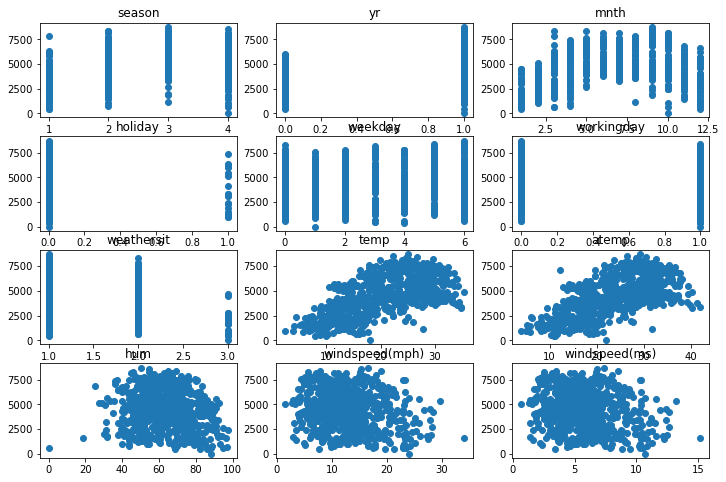

In [10]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(X_df.columns):
    plt.subplot(4, 3, i + 1)
    plt.scatter(X_df[col], y_series)
    plt.title(col);

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12,8)

/Users/aleksashka/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


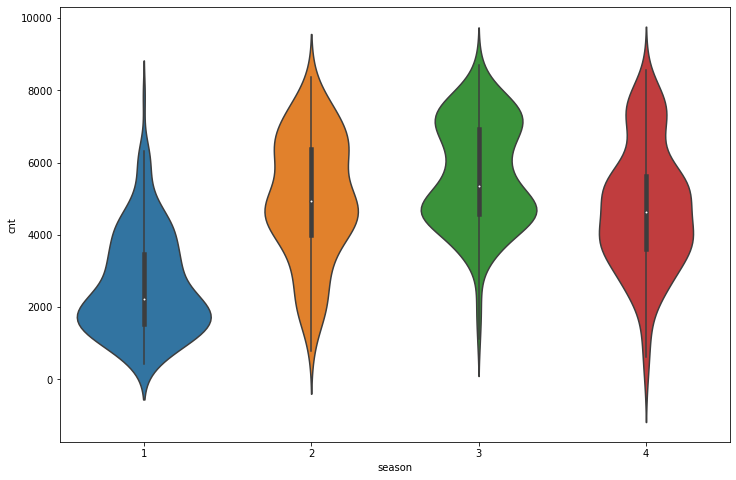

In [13]:
sns.violinplot(data['season'],data['cnt']);

<AxesSubplot:>

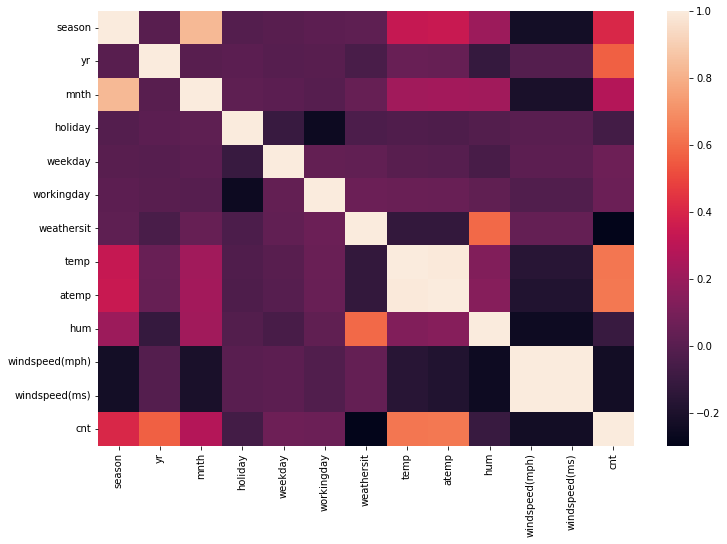

In [14]:
sns.heatmap(data.corr())

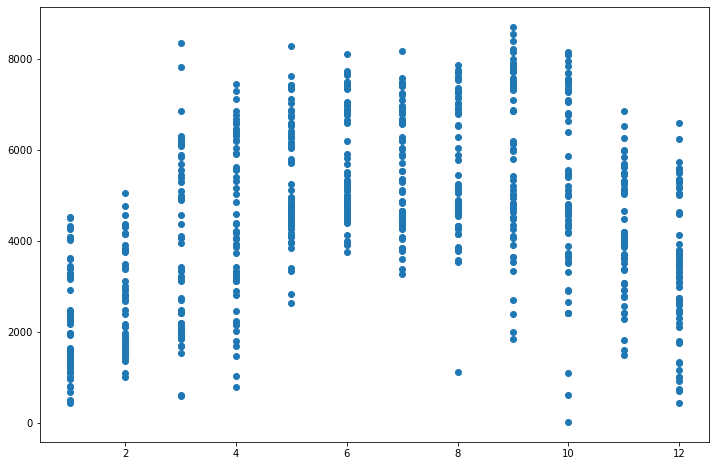

In [16]:
plt.scatter(data.mnth, data.cnt);

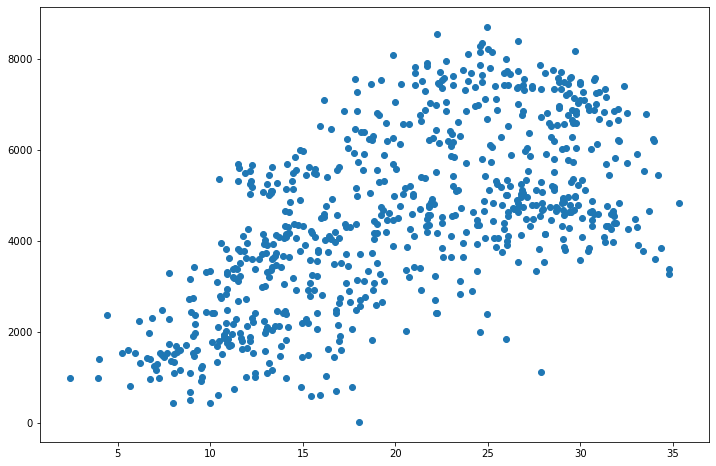

In [17]:
plt.scatter(data.temp, data.cnt);

In [28]:
from sklearn.linear_model import Lasso, LassoCV, LinearRegression, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [45]:
linreg = LinearRegression()
lasso = Lasso(random_state=17)
ridge = Ridge(random_state=17)
lasso_cv = LassoCV()
ridge_cv = RidgeCV()

In [23]:
X, y = data.drop('cnt', axis=1), data.cnt

In [24]:
train_share = 0.7

train_part_len = int(train_share * data.shape[0])

X_train = X.values[:train_part_len, :]
X_valid = X.values[train_part_len:, :]
y_train = y.values[:train_part_len]
y_valid = y.values[train_part_len:]

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [27]:
linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [31]:
mean_absolute_error(y_valid, linreg.predict(X_valid_scaled)), np.sqrt(mean_squared_error(y_valid, linreg.predict(X_valid_scaled)))

(833.0283171402684, 1121.7955535820613)

In [32]:
linreg.coef_

array([ 4.04858832e+02,  9.54070721e+02,  3.08089433e+01, -6.75741275e+01,
        1.03712329e+02,  1.47027518e+01, -2.93817156e+02,  6.24825029e+01,
        8.91174769e+02, -1.58976023e+02, -3.05121590e+12,  3.05121590e+12])

In [38]:
pd.DataFrame(linreg.coef_, data.columns[:-1], columns=["coef"]).sort_values(by ="coef", ascending=False)

,coef
windspeed(ms),3.051216e+12
yr,9.540707e+02
atemp,8.911748e+02
season,4.048588e+02
weekday,1.037123e+02
temp,6.248250e+01
mnth,3.080894e+01
workingday,1.470275e+01
holiday,-6.757413e+01
hum,-1.589760e+02


In [50]:
def train_validate_report(model, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names, forest=False):
    model.fit(X_train_scaled,y_train)
    coef = model.feature_importances_ if forest else model.coef_
    print(np.sqrt(mean_squared_error(y_valid, model.predict(X_valid_scaled))))
    print(pd.DataFrame(coef, feature_names, columns=["coef"]).sort_values(by ="coef", ascending=False))

In [41]:
train_validate_report(lasso, X_train_scaled, y_train, X_valid_scaled, y_valid, data.columns[:-1])

1120.7214094932299
                      coef
yr              952.804560
atemp           877.159813
season          403.416439
weekday         102.643044
temp             75.953962
mnth             29.857599
workingday       14.173377
windspeed(ms)    -0.000000
holiday         -67.073435
hum            -157.547615
windspeed(mph) -187.341353
weathersit     -293.177257


In [46]:
train_validate_report(lasso_cv, X_train_scaled, y_train, X_valid_scaled, y_valid, data.columns[:-1])

1120.7436606195304
                      coef
yr              951.135002
atemp           883.344030
season          403.009581
weekday         101.892690
temp             69.238981
mnth             28.608639
workingday       13.478682
windspeed(ms)    -0.000000
holiday         -66.360460
hum            -156.248289
windspeed(mph) -186.267734
weathersit     -293.016582


In [47]:
lasso_cv.alphas_    

array([1.00067072e+03, 9.33228862e+02, 8.70332360e+02, 8.11674872e+02,
       7.56970702e+02, 7.05953410e+02, 6.58374513e+02, 6.14002274e+02,
       5.72620576e+02, 5.34027866e+02, 4.98036175e+02, 4.64470204e+02,
       4.33166466e+02, 4.03972496e+02, 3.76746102e+02, 3.51354676e+02,
       3.27674547e+02, 3.05590379e+02, 2.84994610e+02, 2.65786927e+02,
       2.47873778e+02, 2.31167915e+02, 2.15587971e+02, 2.01058063e+02,
       1.87507423e+02, 1.74870050e+02, 1.63084394e+02, 1.52093052e+02,
       1.41842489e+02, 1.32282780e+02, 1.23367363e+02, 1.15052816e+02,
       1.07298641e+02, 1.00067072e+02, 9.33228862e+01, 8.70332360e+01,
       8.11674872e+01, 7.56970702e+01, 7.05953410e+01, 6.58374513e+01,
       6.14002274e+01, 5.72620576e+01, 5.34027866e+01, 4.98036175e+01,
       4.64470204e+01, 4.33166466e+01, 4.03972496e+01, 3.76746102e+01,
       3.51354676e+01, 3.27674547e+01, 3.05590379e+01, 2.84994610e+01,
       2.65786927e+01, 2.47873778e+01, 2.31167915e+01, 2.15587971e+01,
      

In [48]:
train_validate_report(ridge, X_train_scaled, y_train, X_valid_scaled, y_valid, data.columns[:-1])

1119.5605202108375
                      coef
yr              954.075878
atemp           730.747340
season          400.114172
temp            221.406072
weekday         103.198680
mnth             34.687740
workingday       15.334339
holiday         -69.046689
windspeed(ms)   -95.819798
windspeed(mph)  -95.819798
hum            -157.702520
weathersit     -293.899386


In [49]:
train_validate_report(ridge_cv, X_train_scaled, y_train, X_valid_scaled, y_valid, data.columns[:-1])

1118.9035433220008
                      coef
yr              934.401985
atemp           534.482125
temp            410.485392
season          375.585733
weekday         100.838401
mnth             48.142392
workingday       16.165284
holiday         -70.019251
windspeed(ms)   -97.770430
windspeed(mph)  -97.770430
hum            -155.174377
weathersit     -291.035853


In [51]:
forest = RandomForestRegressor(n_estimators=100, random_state=17)
train_validate_report(forest, X_train_scaled, y_train, X_valid_scaled, y_valid, data.columns[:-1], forest=True)

1054.0891058377888
                    coef
temp            0.324132
atemp           0.216861
yr              0.200795
hum             0.067893
season          0.064054
weathersit      0.032349
mnth            0.028291
windspeed(ms)   0.020298
weekday         0.018796
windspeed(mph)  0.017695
workingday      0.006051
holiday         0.002783


In [52]:
forest = RandomForestRegressor(n_estimators=500, random_state=17)
train_validate_report(forest, X_train_scaled, y_train, X_valid_scaled, y_valid, data.columns[:-1], forest=True)

1047.1376755069205
                    coef
temp            0.298609
atemp           0.243309
yr              0.199314
hum             0.070565
season          0.062295
weathersit      0.030535
mnth            0.027786
windspeed(mph)  0.020349
weekday         0.019819
windspeed(ms)   0.019613
workingday      0.005191
holiday         0.002615


In [53]:
import os
import json
import pickle
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt

%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import SGDRegressor